In [3]:
import Higgs.predictions as HP
import Higgs.bounds as HB
import Higgs.signals as HS
import numpy as np
import matplotlib.pyplot as plt

plt.rc("axes", labelsize="large")


### HiggsBounds dataset information

In [4]:
bounds = HB.Bounds("../data/HB")

allLims = bounds.limits()
allPubs = np.unique([x.reference() for x in allLims])
lepLims = [x for x in allLims if x.collider() == HP.Collider.LEP]
lepPubs = np.unique([x.reference() for x in lepLims])
run1Lims = [x for x in allLims if x.collider() == HP.Collider.LHC8]
cmsRun1Pubs = np.unique(
    [x.reference() for x in run1Lims if x.experiment() == HP.Experiment.CMS]
)
atlasRun1Pubs = np.unique(
    [x.reference() for x in run1Lims if x.experiment() == HP.Experiment.ATLAS]
)
run2Lims = [x for x in allLims if x.collider() == HP.Collider.LHC13]
cmsRun2Pubs = np.unique(
    [x.reference() for x in run2Lims if x.experiment() == HP.Experiment.CMS]
)
atlasRun2Pubs = np.unique(
    [x.reference() for x in run2Lims if x.experiment() == HP.Experiment.ATLAS]
)
print(f"a total {len(allLims)} search results from {len(allPubs)} publications")
print(f"{len(lepLims)} LEP searches from {len(lepPubs)} publications")
print(
    f"{len(run1Lims)} LHC Run-1 searches from {len(cmsRun1Pubs)} CMS and {len(atlasRun1Pubs)} ATLAS publications"
)
print(
    f"{len(run2Lims)} LHC Run-2 searches from {len(cmsRun2Pubs)} CMS and {len(atlasRun2Pubs)} ATLAS publications"
)


a total 258 search results from 165 publications
25 LEP searches from 13 publications
90 LHC Run-1 searches from 37 CMS and 26 ATLAS publications
143 LHC Run-2 searches from 45 CMS and 44 ATLAS publications


In [5]:
run2Lims[0]

<Higgs.bounds.Limit 180501908: LHC13 [ggH>Zgam] from 1805.01908 (ATLAS 36.1fb-1, M=(1000, 6800))>

### HiggsSignals dataset information

In [6]:
signals = HS.Signals("../data/HS")

allMeas = signals.measurements()

print(
    f"{len(allMeas)} measurements "
    f"({sum(x.experiment()==HP.Experiment.ATLAS for x in allMeas)} ATLAS, "
    f" {sum(x.experiment()==HP.Experiment.CMS for x in allMeas)} CMS, "
    f"{sum(x.experiment()==HP.Experiment.LHCComb for x in allMeas)} Run-1 combinations)"
)
print(f"{signals.observableCount()} individual observables")


22 measurements (11 ATLAS,  9 CMS, 2 Run-1 combinations)
136 individual observables


In [7]:
sm = HP.Predictions()
smH = sm.addParticle(HP.NeutralScalar("h"))
smH.setMass(125.09)
HP.effectiveCouplingInput(smH, HP.smLikeEffCouplings, reference="SMHiggsEW")

hbresultSM = bounds(sm)
print(hbresultSM)
chisqSM = signals(sm)
print(f"SM HiggsSignals chisq: {chisqSM} ({signals.observableCount()} d.o.f.)")


HiggsBounds result: allowed
	particle | obsRatio | expRatio | selected limit description
	---------|----------|----------|---------------------------
	    h    |   0.892  |   4.572  | LHC8 [vbfH,HW,Htt,H,HZ]>[bb,tautau,WW,ZZ,gamgam] from CMS-PAS-HIG-12-045 (CMS 17.3fb-1, M=(110, 600))

SM HiggsSignals chisq: 142.4583562778961 (136 d.o.f.)


In [8]:
pred = HP.Predictions()
h = pred.addParticle(HP.NeutralScalar("h"))
h.setMass(125.09)
HP.effectiveCouplingInput(h, HP.smLikeEffCouplings)
h.setDecayWidth("DM", "DM", 2e-4)
h.setDecayWidth("emu", 1e-6)

hh = pred.addParticle(HP.NeutralScalar("hh"))
hh.setMass(300)
tbeta = 2.0
hhCoups = HP.NeutralEffectiveCouplings(
    tt=1 / tbeta,
    bb=tbeta,
    cc=1 / tbeta,
    ss=tbeta,
    tautau=tbeta,
    mumu=tbeta,
    gg=1 / tbeta,
    gamgam=0.9,
)
HP.effectiveCouplingInput(hh, hhCoups)
hh.setDecayWidth("h", "h", 2e-2)

hp = pred.addParticle(HP.ChargedScalar("H+"))
hp.setMass(400)
hp.setCxn(
    "LHC13",
    "Hpmtb",
    HP.EffectiveCouplingCxns.ppHpmtb(
        "LHC13", hp.mass(), cHpmtbR=0.9, cHpmtbL=0.6, brtHpb=0.0
    ),
)
hp.setTotalWidth(1.2)
hp.setBr("W", "h", 0.6)
hp.setBr("tb", 0.4)


hpp = pred.addParticle(HP.DoublyChargedScalar("H++"))
hpp.setMass(500)
hpp.setDecayWidth("WWsamesign", 0.8)
hpp.setDecayWidth("tautausamesign", 0.1)

pred.setBsmPairCxn(
    "LHC13",
    "h",
    "H+",
    HP.EffectiveCouplingCxns.ppHpmPhi("LHC13", hp.mass(), h.mass(), 0.6),
)
pred.setBsmPairCxn("LHC13", "H++", "H++", 0.6)

hbresult = bounds(pred)
print(hbresult)
chisq = signals(pred)
print(f"HiggsSignals chisq: {chisq} compared to a SM chisq of {chisqSM}")


HiggsBounds result: excluded
	particle | obsRatio | expRatio | selected limit description
	---------|----------|----------|---------------------------
	   H+    |   1.005  |   0.694  | LHC13 [Hpmtb>tb] from 2102.10076 (ATLAS 139fb-1, M=(200, 2000))
	   H++   |   0.085  |   0.098  | LHC13 (X1->[WWsamesign])(X2->[WWsamesign]) from 2101.11961 (ATLAS 139fb-1, M1=M2=(200, 600))
	    h    |   3.763  |   3.954  | LHC13 [ggH,vbfH,HW,HZ]>[emu] from 1909.10235 (ATLAS 139fb-1, M=(125, 125))
	   hh    |   1.132  |   1.820  | LHC13 [H]->X1->(X2->[bb])(X3->[bb, tautau, WW, ZZ, gamgam]) from 1811.09689 (CMS 35.9fb-1, M1=(270, 3000), M2=M3=(125, 125))

HiggsSignals chisq: 153.4568891629067 compared to a SM chisq of 142.4583562778961


### Example: Overview of Resonant HH searches in HiggsBounds

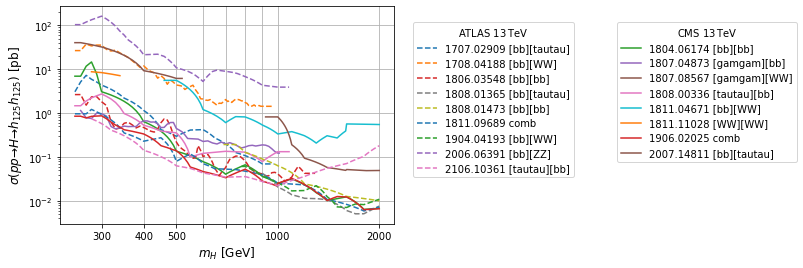

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pred = HP.Predictions()

h = pred.addParticle(HP.NeutralScalar("h", cp="even"))
H = pred.addParticle(HP.NeutralScalar("H"))

h.setMass(125.09)
HP.effectiveCouplingInput(h, HP.smLikeEffCouplings)
H.setDecayWidth("h", "h", 1)
H.setCxn("LHC13", "ggH", 1)

masses = np.arange(250, 2001, 10)
results = {}
for m in masses:
    H.setMass(m)
    results[m] = [
        l for l in bounds(pred).appliedLimits if "H" in l.contributingParticles()
    ]
limits = list({a.limit() for res in results.values() for a in res})
limits.sort(key=lambda l: str(l.id()))

df = pd.DataFrame({"m": masses}).set_index("m")
for lim in limits:
    df[lim.id()] = pd.Series(
        {m: x.obsRatio() for m, res in results.items() for x in res if x.limit() == lim}
    )


def formatProcess(desc):
    parts = desc.split("->")
    finalState = "".join(parts[-2:]).replace(")(X3", "").replace(")", "")
    if len(finalState) > 20:
        return "comb"
    return finalState


fig, ax = plt.subplots()

for lim in limits:
    ax.plot(
        df.index,
        1 / df[lim.id()],
        ls="-" if lim.experiment() == HP.Experiment.ATLAS else "--",
        label="{} {}".format(lim.reference(), formatProcess(lim.processDesc())),
    )
ax.set_yscale("log")
ax.set_xscale("log")

ax.set_xlabel(r"$m_H$ [GeV]")
ax.set_ylabel(r"$\sigma(pp \to H \to h_{125} h_{125})$ [pb]")

ax.set_xticks([300, 400, 500, 600, 700, 800, 900, 1000, 2000])
ax.set_xticklabels([300, 400, 500, "", "", "", "", 1000, 2000])
ax.grid()
atlaslims = [
    l for l in ax.get_lines() if l.get_linestyle() == "--" or l.get_linestyle() == ":"
]
cmslims = [
    l for l in ax.get_lines() if l.get_linestyle() == "-" or l.get_linestyle() == "-."
]
legend1 = ax.legend(
    atlaslims,
    [l.get_label() for l in atlaslims],
    loc="upper left",
    title="ATLAS $13\,\mathrm{TeV}$",
    bbox_to_anchor=(1.04, 0.95),
)
legend2 = ax.legend(
    cmslims,
    [l.get_label() for l in cmslims],
    loc="upper left",
    title="CMS $13\,\mathrm{TeV}$",
    bbox_to_anchor=(1.65, 0.95),
)
ax.add_artist(legend1)
plt.show()


### Example: Kappa Fit with HiggsSignals

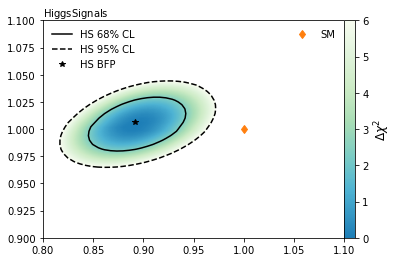

In [10]:
from Higgs.tools.MeasurementValidation import chisqPlot

pred = HP.Predictions()
h = pred.addParticle(HP.NeutralScalar("h"))
h.setMass(125.09)


def coups(kappaF, kappaV):
    return HP.NeutralEffectiveCouplings(
        uu=kappaF,
        dd=kappaF,
        cc=kappaF,
        ss=kappaF,
        tt=kappaF,
        bb=kappaF,
        ee=kappaF,
        mumu=kappaF,
        tautau=kappaF,
        ZZ=kappaV,
        WW=kappaV,
        gg=kappaF,
        gamgam=np.sqrt(
            7.25e-2 * kappaF ** 2 + 1.611 * kappaV ** 2 - 0.6835 * kappaF * kappaV
        ),
    )


def getChisq(kappaF, kappaV):
    HP.effectiveCouplingInput(h, coups(kappaF, kappaV), reference="SMHiggsEW")
    return signals(pred)


chisqFunc = np.frompyfunc(getChisq, 2, 1)

kappaV = np.linspace(0.9, 1.1)
kappaF = np.linspace(0.8, 1.1)

chisq = chisqFunc(*np.meshgrid(kappaF, kappaV))
fig, ax = plt.subplots()
chisqPlot(fig, ax, kappaF, kappaV, chisq)

ax.plot(1, 1, ls="none", marker="d", c="tab:orange", label="SM")
ax.legend(frameon=False)
plt.show()

In [11]:
HP.effectiveCouplingInput(h, coups(0.9, 1.0), reference="SMHiggsEW")
bfpContributions = {m.reference(): m(pred) for m in signals.measurements()}
smContributions = {m.reference(): m(sm) for m in signals.measurements()}

{k: v - smContributions[k] for k,v in bfpContributions.items()}

{'1912.01662': 0.00818368448588247,
 'ATLAS-CONF-2020-026': -1.163888396077006,
 '2011.03652': -4.319267588592494,
 '2004.03447': -0.4875734763334343,
 'CMS-PAS-HIG-18-032': -1.958428684278232,
 '2007.02873': 0.023807599288196812,
 '2111.06712': -1.9064217698739356,
 'ATLAS-CONF-2021-021': -0.004047081988857282,
 '1808.09054': 1.5250036828228812,
 '1811.08856': 0.654848711134461,
 '2011.08280': 0.00680060976239333,
 '2103.04956': -1.805928809032494,
 '2009.04363': 0.04380127097838615,
 '1503.07589': 0.0,
 '2103.06956': -0.6836344277936561,
 'ATLAS-CONF-2019-045': -0.7141851285017564,
 '1606.02266': -0.13755751288021045,
 '2110.04836': -1.4355043304325177,
 '1808.08242': 0.22270994552002543,
 '2007.07830': 0.36283873923084625,
 '1903.10052': -0.7432750179280041,
 '2007.01984': -0.6879472612448261}